<a href="https://colab.research.google.com/github/rachitkhamesra/markowitz/blob/main/assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('nifty50.csv')
df

,Date,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,...,RELIANCE.NS,SBILIFE.NS,HDFCLIFE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
0,2016-01-01,267.549988,520.049988,1493.199951,1208.199951,815.549988,552.625000,84.900002,3108.600098,422.924988,...,507.674988,NaN,NaN,609.585022,449.899994,544.375000,401.899994,239.091003,141.000000,963.849976
1,2016-01-04,257.950012,516.400024,1486.300049,1184.800049,799.099976,539.450012,80.750000,3056.000000,422.975006,...,497.649994,NaN,NaN,605.244995,438.399994,535.250000,377.049988,232.317993,140.949997,934.200012
2,2016-01-05,255.699997,521.900024,1483.349976,1174.469971,800.500000,537.025024,82.599998,3070.649902,421.399994,...,502.575012,NaN,NaN,599.784973,436.450012,531.200012,374.450012,233.363998,139.149994,935.250000
3,2016-01-06,251.800003,525.099976,1500.849976,1190.800049,791.950012,534.674988,80.550003,3046.250000,420.700012,...,516.099976,NaN,NaN,610.724976,430.700012,533.549988,365.899994,227.363998,139.500000,943.950012
4,2016-01-07,245.000000,510.799988,1473.280029,1185.619995,783.799988,525.400024,76.650002,2991.800049,412.524994,...,506.625000,NaN,NaN,610.630005,409.250000,528.099976,343.549988,224.317993,138.100006,925.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2020-12-24,478.549988,947.250000,3618.250000,2909.350098,590.450012,1236.050049,236.949997,5201.799805,919.349976,...,1994.150024,873.900024,657.250000,5184.899902,610.200012,1397.099976,175.949997,513.549988,190.000000,852.799988
1228,2020-12-28,483.549988,947.099976,3603.550049,2929.399902,586.950012,1240.300049,239.899994,5201.799805,921.799988,...,2003.300049,901.650024,678.700012,5204.100098,617.650024,1412.849976,186.350006,520.099976,191.550003,866.950012
1229,2020-12-29,483.399994,965.650024,3593.300049,2930.500000,590.599976,1250.300049,235.600006,5165.600098,935.900024,...,1990.050049,899.299988,673.200012,5200.500000,630.200012,1427.199951,183.449997,528.799988,189.699997,912.900024
1230,2020-12-30,485.399994,983.250000,3583.899902,2909.300049,584.000000,1246.800049,237.399994,5170.950195,940.700012,...,1995.500000,902.950012,675.700012,5334.149902,625.099976,1432.500000,184.149994,528.750000,190.199997,899.049988


In [ ]:
#drop stock columns of "SBILIFE.NS" & "HDFCLIFE.NS"
df = df.drop(["SBILIFE.NS","HDFCLIFE.NS"],axis=1)

#drop null values if any exist 
df.dropna(inplace =True)

#reset index to date using set_index function 
df = df.set_index("Date")

#print df
df1 = df.copy()
df1

,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,...,ONGC.NS,SBIN.NS,RELIANCE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,267.549988,520.049988,1493.199951,1208.199951,815.549988,552.625000,84.900002,3108.600098,422.924988,856.549988,...,161.667007,227.800003,507.674988,609.585022,449.899994,544.375000,401.899994,239.091003,141.000000,963.849976
2016-01-04,257.950012,516.400024,1486.300049,1184.800049,799.099976,539.450012,80.750000,3056.000000,422.975006,859.000000,...,158.699997,220.699997,497.649994,605.244995,438.399994,535.250000,377.049988,232.317993,140.949997,934.200012
2016-01-05,255.699997,521.900024,1483.349976,1174.469971,800.500000,537.025024,82.599998,3070.649902,421.399994,847.950012,...,161.233002,217.750000,502.575012,599.784973,436.450012,531.200012,374.450012,233.363998,139.149994,935.250000
2016-01-06,251.800003,525.099976,1500.849976,1190.800049,791.950012,534.674988,80.550003,3046.250000,420.700012,843.049988,...,158.367004,216.850006,516.099976,610.724976,430.700012,533.549988,365.899994,227.363998,139.500000,943.950012
2016-01-07,245.000000,510.799988,1473.280029,1185.619995,783.799988,525.400024,76.650002,2991.800049,412.524994,820.250000,...,151.067001,209.550003,506.625000,610.630005,409.250000,528.099976,343.549988,224.317993,138.100006,925.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,478.549988,947.250000,3618.250000,2909.350098,590.450012,1236.050049,236.949997,5201.799805,919.349976,2402.250000,...,93.150002,266.850006,1994.150024,5184.899902,610.200012,1397.099976,175.949997,513.549988,190.000000,852.799988
2020-12-28,483.549988,947.099976,3603.550049,2929.399902,586.950012,1240.300049,239.899994,5201.799805,921.799988,2388.899902,...,93.800003,275.200012,2003.300049,5204.100098,617.650024,1412.849976,186.350006,520.099976,191.550003,866.950012
2020-12-29,483.399994,965.650024,3593.300049,2930.500000,590.599976,1250.300049,235.600006,5165.600098,935.900024,2384.300049,...,93.150002,277.899994,1990.050049,5200.500000,630.200012,1427.199951,183.449997,528.799988,189.699997,912.900024


In [ ]:
name = list(df)
name

['ADANIPORTS.NS',
 'TECHM.NS',
 'BRITANNIA.NS',
 'TCS.NS',
 'SUNPHARMA.NS',
 'INFY.NS',
 'HINDALCO.NS',
 'DRREDDY.NS',
 'HCLTECH.NS',
 'HINDUNILVR.NS',
 'TATASTEEL.NS',
 'NTPC.NS',
 'CIPLA.NS',
 'ITC.NS',
 'BPCL.NS',
 'WIPRO.NS',
 'JSWSTEEL.NS',
 'GAIL.NS',
 'DIVISLAB.NS',
 'ULTRACEMCO.NS',
 'NESTLEIND.NS',
 'ASIANPAINT.NS',
 'EICHERMOT.NS',
 'IOC.NS',
 'GRASIM.NS',
 'BAJAJ-AUTO.NS',
 'HDFC.NS',
 'M&M.NS',
 'UPL.NS',
 'SHREECEM.NS',
 'MARUTI.NS',
 'TITAN.NS',
 'BAJAJFINSV.NS',
 'KOTAKBANK.NS',
 'COALINDIA.NS',
 'BHARTIARTL.NS',
 'HEROMOTOCO.NS',
 'LT.NS',
 'ONGC.NS',
 'SBIN.NS',
 'RELIANCE.NS',
 'BAJFINANCE.NS',
 'AXISBANK.NS',
 'HDFCBANK.NS',
 'TATAMOTORS.NS',
 'ICICIBANK.NS',
 'POWERGRID.NS',
 'INDUSINDBK.NS']

In [ ]:
def CAGR(df,name):
    
    #USING df[name] and iloc function, identify the initial price of stock 
    start_value = df[name].iloc[0]
    
    #Like we did for Start Value, USING df[name] and iloc function, identify the final price of stock 
    end_value = df[name].iloc[-1]
    
    #Specify the Number of years we are taking into account 
    n = 5
    
    #WRITE THE CAGR FUNCTION USING START VALUE, END VALUE AND NUMBER OF PERIODS
    cagr = (end_value/start_value)**(1/n) -1 
    
    return cagr

In [ ]:
def volatility(df,name):
    df[name] = df[name].pct_change()
    vol = df[name].std(ddof=0) * np.sqrt(252)
    return vol

In [ ]:
def sharpe(x,y,rf):
    
    #Write down the Sharpe Ratio formula using CAGR, Volatility and Risk-Free rate
    sr = (x - 0.06)/y
    
    return sr

In [ ]:
cagr = []
vol = []
sr = []
rf = 0.06
for i in range(len(name)):
    x = CAGR(df, name[i])
    y = volatility(df, name[i])
    z = sharpe(x,y,rf)
    cagr.append(x)
    vol.append(y)
    sr.append(z)

#PRINT CAGR, VOL, SR LIST
print(sr)

[0.18068245477048975, 0.23772640580515617, 0.4918751866486566, 0.49461919141633914, -0.36961621138164813, 0.4157060550580363, 0.4104646748914801, 0.1663676075912103, 0.41434475141306476, 0.7160329573311028, 0.3992257748630759, -0.371862806099429, -0.05004698085182572, -0.249487133783008, -0.02592969421681889, 0.27573429619633294, 0.6740290736724791, -0.07533354796957267, 0.5875533268898606, 0.25488084248231957, 0.7959769550066873, 0.7706575605456922, 0.052755158377256944, -0.2844876958908887, 0.11137706066041986, 0.01775305846248442, 0.30947275175411393, -0.10484788634761683, 0.09974581738352396, 0.33368316667886433, 0.14378562456984884, 0.8446366391063602, 0.7895699676143428, 0.5764548757620351, -0.766725814085621, 0.12349731204063494, -0.0988518651590619, 0.08372993852569964, -0.4679595031845641, -0.056444278375967515, 0.8234749651084392, 1.149947985638071, 0.01663937473646884, 0.651620848687381, -0.42528123168683873, 0.31204936060462796, 0.005358393500279929, -0.15840154869587744]


In [ ]:
df0 = pd.DataFrame()
df0["Name"] = name
df0["Sharpe Ratio"] = sr 
df0["CAGR"] = cagr
df0["Vol"] = vol

df0.sort_values(by = "Sharpe Ratio", ascending = False, inplace = True)
newlist = df0[:15]["Name"].tolist()
df0

,Name,Sharpe Ratio,CAGR,Vol
41,BAJFINANCE.NS,1.149948,0.540883,0.418178
31,TITAN.NS,0.844637,0.348035,0.341017
40,RELIANCE.NS,0.823475,0.313554,0.307908
20,NESTLEIND.NS,0.795977,0.260243,0.251569
32,BAJAJFINSV.NS,0.789570,0.350331,0.367708
21,ASIANPAINT.NS,0.770658,0.257622,0.256433
9,HINDUNILVR.NS,0.716033,0.228358,0.235126
16,JSWSTEEL.NS,0.674029,0.303986,0.361982
43,HDFCBANK.NS,0.651621,0.214142,0.236551
18,DIVISLAB.NS,0.587553,0.270079,0.357548


In [ ]:
df2 = pd.DataFrame()
for i in range(len(newlist)):
    df2[newlist[i]] = df1[newlist[i]]
    
df2.reset_index(inplace=True)
df2 = df2.drop(["Date"], axis=1)
df2

,BAJFINANCE.NS,TITAN.NS,RELIANCE.NS,NESTLEIND.NS,BAJAJFINSV.NS,ASIANPAINT.NS,HINDUNILVR.NS,JSWSTEEL.NS,HDFCBANK.NS,DIVISLAB.NS,KOTAKBANK.NS,TCS.NS,BRITANNIA.NS,INFY.NS,HCLTECH.NS
0,609.585022,352.049988,507.674988,5785.149902,1983.800049,878.750000,856.549988,102.699997,544.375000,1162.500000,727.250000,1208.199951,1493.199951,552.625000,422.924988
1,605.244995,351.399994,497.649994,5669.799805,1959.500000,880.799988,859.000000,104.470001,535.250000,1149.699951,705.299988,1184.800049,1486.300049,539.450012,422.975006
2,599.784973,347.700012,502.575012,5662.399902,1946.000000,900.650024,847.950012,108.309998,531.200012,1147.500000,707.750000,1174.469971,1483.349976,537.025024,421.399994
3,610.724976,347.850006,516.099976,5719.500000,1938.550049,886.400024,843.049988,105.820000,533.549988,1137.199951,703.599976,1190.800049,1500.849976,534.674988,420.700012
4,610.630005,344.049988,506.625000,5638.950195,1927.050049,872.349976,820.250000,102.635002,528.099976,1126.949951,691.650024,1185.619995,1473.280029,525.400024,412.524994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,5184.899902,1495.900024,1994.150024,18566.300780,8992.549805,2648.250000,2402.250000,366.250000,1397.099976,3749.600098,1960.599976,2909.350098,3618.250000,1236.050049,919.349976
1228,5204.100098,1543.550049,2003.300049,18597.300780,8995.049805,2683.899902,2388.899902,386.600006,1412.849976,3766.000000,1988.900024,2929.399902,3603.550049,1240.300049,921.799988
1229,5200.500000,1540.099976,1990.050049,18262.699220,8976.049805,2696.800049,2384.300049,381.799988,1427.199951,3784.199951,1999.300049,2930.500000,3593.300049,1250.300049,935.900024
1230,5334.149902,1552.599976,1995.500000,18379.199220,8961.700195,2734.399902,2406.600098,386.100006,1432.500000,3799.699951,2017.949951,2909.300049,3583.899902,1246.800049,940.700012


In [ ]:
df3 = np.log(df2/df2.shift(1))
df3.head()

,BAJFINANCE.NS,TITAN.NS,RELIANCE.NS,NESTLEIND.NS,BAJAJFINSV.NS,ASIANPAINT.NS,HINDUNILVR.NS,JSWSTEEL.NS,HDFCBANK.NS,DIVISLAB.NS,KOTAKBANK.NS,TCS.NS,BRITANNIA.NS,INFY.NS,HCLTECH.NS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.007145,-0.001848,-0.019944,-0.020140,-0.012325,0.002330,0.002856,0.017088,-0.016904,-0.011072,-0.030647,-0.019558,-0.004632,-0.024130,0.000118
2,-0.009062,-0.010585,0.009848,-0.001306,-0.006913,0.022286,-0.012947,0.036098,-0.007595,-0.001915,0.003468,-0.008757,-0.001987,-0.004505,-0.003731
3,0.018076,0.000431,0.026556,0.010034,-0.003836,-0.015948,-0.005795,-0.023258,0.004414,-0.009017,-0.005881,0.013808,0.011729,-0.004386,-0.001662
4,-0.000156,-0.010984,-0.018529,-0.014183,-0.005950,-0.015978,-0.027417,-0.030561,-0.010267,-0.009054,-0.017130,-0.004360,-0.018540,-0.017499,-0.019623


In [ ]:
#CELL WILL TAKE 10-15 MINS TO RUN
np.random.seed(42)

#no. of set of weights to be initialised
num_ports = 6000*100
all_weights = np.zeros((num_ports, df3.shape[1]))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    
    # Weights
    all_weights[x,:] = np.array(np.random.random(15))
    all_weights[x,:] /= np.sum(all_weights[x,:])
    
    # Save weights
    
    # Expected return
    ret_arr[x] = np.sum( (df3.mean() * all_weights[x,:] * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(all_weights[x,:].T, np.dot(df3.cov()*252, all_weights[x,:])))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [ ]:
np.max(sharpe_arr)

1.4459370971008918

In [ ]:
all_weights[np.argmax(sharpe_arr)]

array([0.12558355, 0.07302061, 0.10192346, 0.12388195, 0.00126858,
       0.13972777, 0.12606657, 0.05210896, 0.00427857, 0.09537333,
       0.00246035, 0.13186496, 0.00987491, 0.00684009, 0.00572634])

In [ ]:
p = np.argmax(sharpe_arr)
#POINT p is the point of maximum sharpe ratio
mr = ret_arr[p]
mv = vol_arr[p]

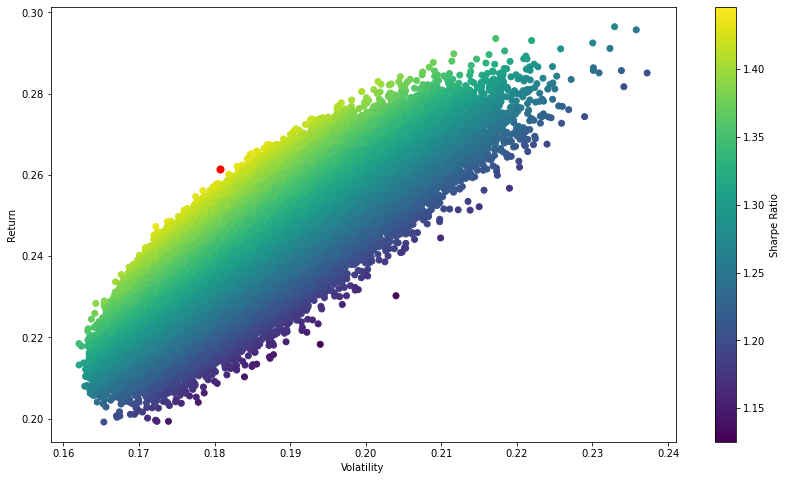

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(mv, mr,c='red', s=50) # red dot

plt.show()

In [ ]:
fy = np.linspace(0.2,0.35,201)

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(df3.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(df3.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def min_vol(weights):
    return get_ret_vol_sr(weights)[1]

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1


In [ ]:
a = 1/15
c = ((0,1),)
b = []
d = ()
for i in range(15):
    b.append(a)
    d = d+c

In [ ]:
from scipy.optimize import minimize

In [ ]:
#using minimize

cons = cons = {'type':'eq', 'fun':check_sum}
result_opt = minimize(neg_sharpe, b, method='SLSQP', bounds=d, constraints=cons)
print(result_opt['fun'])
print(result_opt['x'])

-1.4705897752764763
[1.58522866e-01 1.08465775e-01 1.23769439e-01 2.02165885e-01
 3.66643350e-17 7.92634459e-02 1.09345878e-01 0.00000000e+00
 0.00000000e+00 9.67391325e-02 0.00000000e+00 1.21727580e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [ ]:
funds_opt = 10000000
mon_opt = np.dot(funds_opt, result_opt['x'])

In [ ]:
num_sto_opt = mon_opt/df2.iloc[-1]
num_sto_opt

DF_opt = pd.DataFrame(num_sto_opt)
DF_opt.reset_index(inplace = True)
DF_opt.columns = ['Name', 'Number of Shares']
DF_opt = DF_opt.round(6)
DF_opt

,Name,Number of Shares
0,BAJFINANCE.NS,299.370864
1,TITAN.NS,692.121194
2,RELIANCE.NS,623.429383
3,NESTLEIND.NS,109.931319
4,BAJAJFINSV.NS,0.000000
5,ASIANPAINT.NS,286.718922
6,HINDUNILVR.NS,456.482769
7,JSWSTEEL.NS,0.000000
8,HDFCBANK.NS,0.000000
9,DIVISLAB.NS,251.800242


In [ ]:
fx = []

for i in fy:
    #print(i)
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - i})
    
    result = minimize(min_vol, b, method='SLSQP', bounds=d, constraints=cons)
    fx.append(result['fun'])

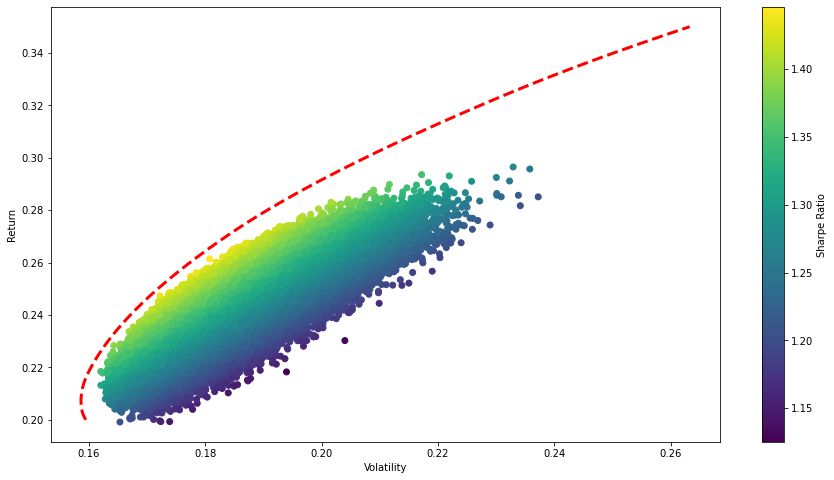

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(fx,fy, 'r--', linewidth=3)
plt.show()

In [ ]:
funds = 10000000
mon = np.dot(funds, all_weights[p])
mon

array([1255835.52117695,  730206.13648043, 1019234.61478599,
       1238819.54318279,   12685.83196979, 1397277.65200723,
       1260665.66478944,  521089.64068944,   42785.67188134,
        953733.34075575,   24603.52417945, 1318649.56781786,
         98749.06479499,   68400.86139066,   57263.36409789])

In [ ]:
#Store the number of stocks that you'll hold for the 15 stocks (in num_sto) basis the prices on the last day
num_sto = mon/df2.iloc[-1]
num_sto

BAJFINANCE.NS     237.164880
TITAN.NS          465.945267
RELIANCE.NS       513.390717
NESTLEIND.NS       67.363030
BAJAJFINSV.NS       1.424358
ASIANPAINT.NS     505.435939
HINDUNILVR.NS     526.286097
JSWSTEEL.NS      1345.789319
HDFCBANK.NS        29.788812
DIVISLAB.NS       248.245234
KOTAKBANK.NS       12.328886
TCS.NS            460.623375
BRITANNIA.NS       27.611688
INFY.NS            54.467956
HCLTECH.NS         60.522499
Name: 1231, dtype: float64

In [ ]:
DF = pd.DataFrame(num_sto)
DF.reset_index(inplace = True)
DF.columns = ['Name', 'Number of Shares']
DF

,Name,Number of Shares
0,BAJFINANCE.NS,237.164880
1,TITAN.NS,465.945267
2,RELIANCE.NS,513.390717
3,NESTLEIND.NS,67.363030
4,BAJAJFINSV.NS,1.424358
5,ASIANPAINT.NS,505.435939
6,HINDUNILVR.NS,526.286097
7,JSWSTEEL.NS,1345.789319
8,HDFCBANK.NS,29.788812
9,DIVISLAB.NS,248.245234
